## Statistical Data Analysis

In this notebook I will work with basics of statistical data analysis. 
I will start from reading the data from 'data.csv' and storing the values of the 'data' column in the format of np.ndarray in the variable data. 

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

data = df['data'].to_numpy()

print(data[:10])

[17.49945292 19.66239904  7.18282343 29.84162485  9.23938649 14.94951581
 23.0172885  12.52827148 13.65228669 14.54595431]


Now I'll run the code below. For correct operation of all subsequent methods, the data must be in the form of a one-dimensional vector, i.e., have a size of (100,).

In [20]:
data.shape

(100,)

## Checking the sample for normality

1. **Distribution Visualization**
Let's start by examining the distribution of our data. To do this, I will construct a distribution plot (similar to a histogram, but normalized so that the area under the curve equals 1), and overlay a line plot of the probability density function (PDF) of a normal distribution with the same mean and standard deviation as our data.

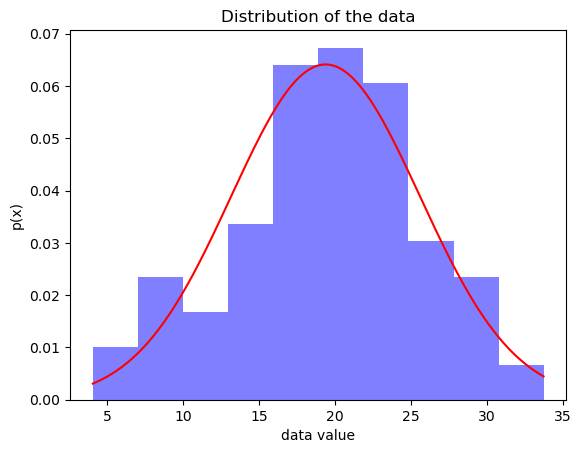

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import norm

x_axis = np.arange(data.min(), data.max(), 0.01)

plt.hist(data, density=True, bins=10, alpha=0.5, color='blue')
plt.plot(x_axis, norm.pdf(x_axis, np.mean(data), np.std(data)), color='r')

plt.title('Distribution of the data')
plt.xlabel('data value')
plt.ylabel('p(x)')

plt.show()

Based on the obtained graph, several conclusions can be drawn:

1. There is a larger sample than expected for values from 4 to 9, 18, 21-23, 29-30. The significant difference is more pronounced at the beginning of the curve (up to approximately 0.015).
2. There are fewer cases than expected from 10 to 17, as well as 24-25, 31. The significant difference is observed more in the range of 10-17 (up to approximately 0.02).
3. The overall trend of the graph is quite close to the density curve; however, it is worth exploring the data further to assess the errors in conclusions #1 and #2.

2. **QQ graph**

Another visualization method for checking the distribution of a data sample for normality is the quantile-quantile plot, Q-Q plot.

This plot generates a sample of an idealized distribution against which we compare our data, in this case, the Gaussian distribution. The data of the idealized sample is divided into groups (e.g., 5), called quantiles. Each point of our data is paired with a corresponding member of the idealized distribution.

The obtained points are plotted as a scatter plot with the idealized values on the x-axis and the data sample on the y-axis.

If our data sample perfectly matches the idealized one, it will appear on the plot as a line of points at a 45-degree angle from the lower left corner to the upper right corner. Often, an additional line is drawn on the plot to help understand this expectation. Deviations of points from the line of expectations (the ideal scenario) indicate deviations of our data from the expected distribution.

I will create a QQ plot in Python using the statsmodels qqplot() function. The function takes a data sample and by default assumes that we are comparing it with a Gaussian distribution. I also can draw a standardized line by setting the line argument to s.

So I will generate a QQ plot using the specified method and write a conclusion on whether the distribution is normal according to this plot.

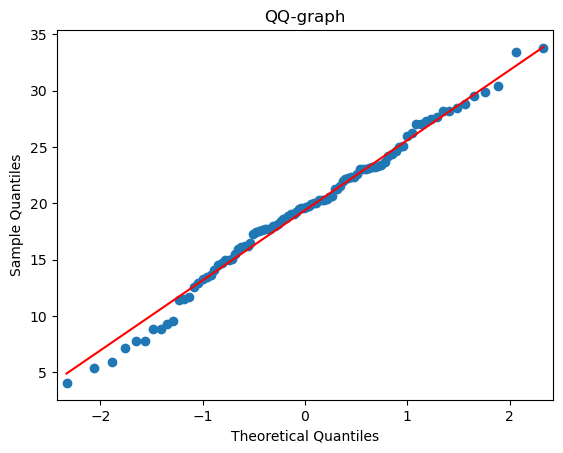

In [22]:
import statsmodels.api as sm

data = df['data'].to_numpy()

sm.qqplot(np.array(data), line='s')
plt.title('QQ-graph')
plt.show()

According to the obtained plot, it is noticeable that there are more data points at small values than expected. Since a normal distribution expects the points on the QQ plot to be evenly distributed along the line, our result may indicate that the data distribution is not ideally normal. It is not critical, but in such a case, it is important to analyze the reasons for this deviation from normality and consider it in further data analysis. In other segments of the plot, it is quite close to 45 degrees.

Очікуваний результат:

3. **Shapiro-Wilk Test**
The Shapiro-Wilk test determines how likely it is that a sample was drawn from a normal distribution.
The null hypothesis H0 of the Shapiro-Wilk test states that a random variable, the sample of which is known, is distributed according to a normal law. The alternative hypothesis H1 states that the distribution law is not normal.

So now I will test the sample for normality using the Shapiro-Wilk test, implemented in the scipy.stats.shapiro function. I will draw a conclusion based on the analysis of the p-value. 

In [23]:
from scipy.stats import shapiro

stat, p_value = shapiro(data)

print(f'Statistics = {stat}, p-value = {p_value}')

alpha = 0.05

if p_value <= alpha:
    print("Reject hypothesis H0: the distribution is normal.")
else:
    print("Can't reject the hypothesis H0: the distribution is not normal.")

Statistics = 0.988785982131958, p-value = 0.5678303241729736
Can't reject the hypothesis H0: the distribution is not normal.


## Z-test

4. **Z-test**
Imagine that this data is the sum of purchases in dollars made by the customers on the website during July 2022. Before this month, it had an average sales per transaction of $20. Did it statistically significantly increase the average transaction amount in the last month? I will output the p-value of the statistical test and draw a conclusion whether I currently have a statistically significant difference in the average transaction amount.

In [24]:
from scipy.stats import zscore
from statsmodels.stats.weightstats import ztest

previous_average = 20

z_statistic, p_value = ztest(data, value=previous_average, alternative='larger')

print(f'Z-statistic = {z_statistic}, p-value = {p_value}')

alpha = 0.05

if p_value <= alpha:
    print("Rejecting the null hypothesis H0: There is a statistically significant difference in the average transaction amount.")
else:
    print("Cannot reject the null hypothesis H0: There is no statistically significant difference in the average transaction amount.")

Z-statistic = -0.9953477389335053, p-value = 0.8402164165464012
Cannot reject the null hypothesis H0: There is no statistically significant difference in the average transaction amount.


5. After some time, was collected sales data for August 2022, which is stored in the file data_2.csv. There were slightly more sales, but has the average transaction amount changed significantly compared to July 2022? I will verify this using a z-test. Also I will output the p-value of the statistical test and draw a conclusion whether I have a statistically significant difference in the average transaction amount between the two months.

In [25]:
from statsmodels.stats.weightstats import ztest
import pandas as pd

data_july = pd.read_csv('data.csv')
data_august = pd.read_csv('data_2.csv')

average_july = data_july['data'].mean()
average_august = data_august['data'].mean()

z_statistic, p_value = ztest(data_july['data'], x2=data_august['data'], value=0)

print(f'Z-statistic = {z_statistic}, p-value = {p_value}')

alpha = 0.05

if p_value <= alpha:
    print("Reject H0: There is a statistically significant difference in the average transaction amount between July and August.")
else:
    print("Cannot reject H0: There is no statistically significant difference in the average transaction amount between July and August.")

Z-statistic = 0.005246673456808504, p-value = 0.9958137794593356
Cannot reject H0: There is no statistically significant difference in the average transaction amount between July and August.


## Analysis of A/B Test

Now I want to analyze the data of an A/B test in the popular game Cookie Cats. It's a classic puzzle game in the style of 'match three', where the player has to match tiles of the same color to clear the board and win the level. The board also features singing cats.

During the game, players encounter gates that force them to wait for some time before they can progress or make a purchase in the app. In this task block, I will analyze the results of the A/B test when the first gate in Cookie Cats was moved from level 30 to level 40. Specifically, I will analyze the impact on player retention. That is, I want to understand whether moving the gates by 10 levels later somehow affected whether users stop playing the game sooner or later in terms of the number of days since installing the game.

I will be working with data from the file cookie_cats.csv. The variables in the data are as follows:

userid - a unique number identifying each player.
version - whether the player was assigned to the control group (gate_30 - gate at level 30) or the test group (gate_40 - gate at level 40).
sum_gamerounds - the number of game rounds played by the player during the first week after installation.
retention_1 - whether the player returned and started playing 1 day after installation.
retention_7 - whether the player returned and started playing 7 days after installation.
When a player installed the game, they were randomly assigned to either the gate_30 or gate_40 group.

6. I will read the A/B test data into the variable df and output the mean value of the metric retention_7 (7-day retention) by game versions and then formulate the hypothesis: which version provides better 7-day retention after installing the game? 

In [26]:
import pandas as pd

df = pd.read_csv('cookie_cats.csv')
print(df.head())

retention_7_mean = df.groupby('version')['retention_7'].mean()
print(retention_7_mean)

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


The obtained results indicate that:

1. For players in the control group (gate_30), the average value of retention_7 is 0.190201.
2. For players in the test group (gate_40), the average value of retention_7 is 0.182000. At first glance, it may seem that for players in the control group (gate_30), the retention_7 metric is higher, but to draw conclusions about the statistical significance of the difference, a statistical analysis, such as a t-test, is needed.

7. Now I will perform a z-test to determine if either version of the game yields a better retention_7 metric at a significance level of 0.05. Also, I'll compute the confidence intervals for both samples.

In [27]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

count_control = df[df['version'] == 'gate_30']['retention_7'].count()
success_control = df[df['version'] == 'gate_30']['retention_7'].sum()
count_treatment = df[df['version'] == 'gate_40']['retention_7'].count()
success_treatment = df[df['version'] == 'gate_40']['retention_7'].sum()

z_statistic, p_value = proportions_ztest([success_control, success_treatment], [count_control, count_treatment])
print(f'z statistic: {z_statistic}')
print(f'p-value: {p_value}')

ci_control = sm.stats.proportion_confint(success_control, count_control, alpha=0.05)
ci_treatment = sm.stats.proportion_confint(success_treatment, count_treatment, alpha=0.05)

print(f'95% Confidence interval for the control group: {ci_control}')
print(f'95% Confidence interval for the treatment group: {ci_treatment}')

z statistic: 3.164358912748191
p-value: 0.001554249975614329
95% Confidence interval for the control group: (0.18656311652199903, 0.19383956804175934)
95% Confidence interval for the treatment group: (0.17845430073314686, 0.18554578720019968)


The results from the provided code indicate the following:

z statistic = 3.16 - this is a large value, indicating a significant difference in retention between the groups.
p-value = 0.00155, which is very small, suggesting rejection of the null hypothesis of no difference in retention. At a significance level of 0.05, we can reject the null hypothesis.
The confidence intervals for both groups do not overlap, confirming a statistically significant difference between the gate_30 and gate_40 groups in 7-day retention.
Therefore, based on these results, we can conclude that there is a statistically significant difference in user retention between the groups, and this difference is not likely due to chance.

Hence, players with gates at level 30 (gate_30) exhibit statistically significantly better 7-day retention compared to players with gates at level 40 (gate_40). Therefore, it is recommended to keep the gates at level 30.

8. There is another type of test used for binary metrics like "whether a user performs an action or not" - the Chi-squared test. To conduct the Chi-squared test, I'll use the chi2_contingency function from scipy.stats to calculate the Chi-squared statistic and p-value for testing a specific hypothesis. I will perform the Chi-squared test at a significance level of 5% to determine whether there is a dependency between the game version and whether the player will log in on the 7th day after installing the game.

Here are the hypotheses:

H0: The value of retention_7 is independent of the game version.
H1: There is a dependency between the game version and the value of retention_7.

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
df = pd.read_csv("cookie_cats.csv")
contingency_table = pd.crosstab(df['version'], df['retention_7'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: there is a statistically significant dependency between the game version and retention_7.")
else:
    print("Fail to reject the null hypothesis: there is no statistically significant dependency between the game version and retention_7.")

Chi-squared statistic: 9.959086799559167
p-value: 0.0016005742679058301
Reject the null hypothesis: there is a statistically significant dependency between the game version and retention_7.
